In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re

import numpy as np
from scipy import misc

from matplotlib import pyplot as plt

In [3]:
from nn.MLP import MLP, sigmoid, d_sigmoid, d_identity, identity, tanh, d_tanh
from nn.MLP import xeuclidian, d_xeuclidian, log_Bernoulli_likelihood, d_log_Bernoulli_likelihood
from nn.Norms import l2, d_l2

ImportError: No module named nn.MLP

In [4]:
train_input = np.empty((0, 841))
cv_input = np.empty((0, 841))
test_input = np.empty((0, 841))
train_output = np.empty((0, 26))
cv_output = np.empty((0, 26))
test_output = np.empty((0, 26))

In [5]:
for f in os.listdir('./test_data/big_alphabet_29x29/'):
    v = np.array(misc.imread('./test_data/big_alphabet_29x29/' + f, flatten=True)).flatten() / 255.0
    parts = re.split('[-\.]', f)
    i = int(parts[1])
    o = np.zeros(26)
    o[i] = 1.0
    if len(parts) == 5 and parts[2] in ['7', '8']:
        cv_input = np.vstack([cv_input, v])
        cv_output = np.vstack([cv_output, o])
    elif len(parts) == 5 and parts[2] in ['5', '6']:
        test_input = np.vstack([cv_input, v])
        test_output = np.vstack([cv_output, o])
    else:
        train_input = np.vstack([train_input, v])
        train_output = np.vstack([train_output, o])

In [6]:
train_input.shape

(156, 841)

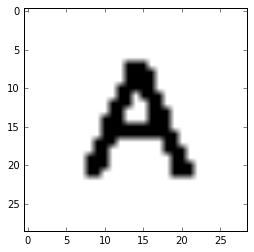

In [7]:
plt.imshow(train_input[0].reshape((29,29)), cmap="gray")

In [8]:
from src.network import Network

In [78]:
from src.activation_funcs import logistic, identy
from src.cost_funcs import cross_entropy, quadratic

In [77]:
train_output[7]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [16]:
d_features = train_input.shape[1]
m_classes = train_output.shape[1]

In [34]:
d_features

841

In [94]:
sizes = [d_features, 60, m_classes]
act_funcs = [logistic, logistic]
nn = Network(sizes, act_funcs, cost_func=cross_entropy, epochs=10, eta=0.001)

In [95]:
nn.fit(train_input, train_output, cv_input, cv_output)

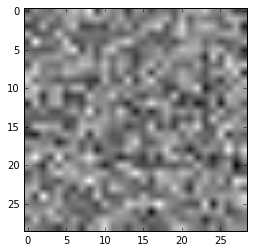

In [96]:
plt.imshow(nn._weights[1][30, :].reshape((29,29)), cmap="gray")

In [97]:
nn.predict_proba(test_input)

array([[ 0.14940548,  0.98113397,  0.28477328, ...,  0.9990335 ,
         0.0239952 ,  0.13937314],
       [ 0.10420313,  0.9955792 ,  0.15263516, ...,  0.99793971,
         0.02690051,  0.25906225],
       [ 0.00497005,  0.9848499 ,  0.70450413, ...,  0.99848746,
         0.3558151 ,  0.19001512],
       ..., 
       [ 0.0042902 ,  0.99811149,  0.44182183, ...,  0.99937072,
         0.02885551,  0.07856391],
       [ 0.0026066 ,  0.99898531,  0.35050701, ...,  0.99919243,
         0.04489029,  0.0581961 ],
       [ 0.00265648,  0.9985544 ,  0.62687819, ...,  0.99964902,
         0.29885306,  0.04837486]])

In [98]:
y_pred = np.argmax(nn.predict_proba(test_input), axis=1)
y_pred

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 21, 21, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 21, 15, 15])

In [99]:
y_test = np.argmax(test_output, axis=1)
y_test

array([ 0,  0,  1,  1, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16,
       16, 17, 17, 18, 18, 19, 19,  2,  2, 20, 20, 21, 21, 22, 22, 23, 23,
       24, 24, 25, 25,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9])

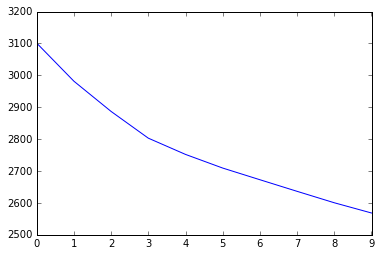

In [100]:
plt.plot(range(len(nn.scores)), nn.scores)

In [24]:
nn = MLP(841, (100, 26),
                       activation_functions=[sigmoid, sigmoid],
                       rng=(lambda n: np.random.normal(0, 0.01, n)))

In [25]:
train_cost, cv_cost = \
    nn.train_backprop(train_input, train_output,
                      d_f_list=[d_sigmoid, d_sigmoid],
                      goal=log_Bernoulli_likelihood,
                      d_goal=d_log_Bernoulli_likelihood,
                      batch_size=None,
                      max_iter=100,
                      learning_rate=0.1,
                      momentum_rate=0.9,
                      neural_local_gain=(0.005, 0.995, 0.001, 1000),
                      stop_threshold=0.05,
                      cv_input_data=cv_input,
                      cv_output_data=cv_output,
                      #regularization_rate=0.1,
                      #regularization_norm=l2,
                      #d_regularization_norm=d_l2
                      verbose=True
                      )

Iteration: 99 (0.05673 s), train/cv cost: 4.22052433538 / 4.22173899493

In [26]:
t = np.argmax(train_output, axis=1)
y = np.argmax(nn.compute_output(train_input), axis=1)

print('%s / %s' % (sum(t == y), train_output.shape[0]))

114 / 156


In [27]:
t = np.argmax(test_output, axis=1)
y = np.argmax(nn.compute_output(test_input), axis=1)

print('%s / %s' % (sum(t == y), test_output.shape[0]))

34 / 51
